# Import the dependencies

In [1]:
import os
from mieze_python.mieze import Mieze
from pprint import pprint
import sys 
print(sys.version)

'''
###########################################################
The manager is the instance linking the following parts:
- I/O manager for input output
- The processing of data 
- The fitting of data (maybe merge processing and fitting)
- The graphical manopulation of reduced and fitted data
###########################################################
'''
tool = Mieze()



3.7.0 (default, Aug 20 2018, 21:19:42) 
[Clang 9.1.0 (clang-902.0.39.2)]


# Process the elastic data

## First set up the environnement

In [2]:
'''
###########################################################
INITIALISE THE ENVIRONEMENT:

Each dataset is initialised in a new environement. We
therefore initialise a new environement through the manager
run command with the keyword 'new environement'. The
title and selected type are optional and will fall back to 
'No_title' and 'MIEZE' if not provided.

###########################################################
'''
elastic_env = tool.new_environment(title = 'elastic', select = 'SANS')


## Load the data

In [3]:
'''
###########################################################
LOAD THE DATA:

at a further point in time different routines will be 
provided to load data. The current way of proceedign is to 
load a file containing all relevant information and let the
routine parse the content. 
###########################################################
'''
elastic_env.io.load_SANS_PAD('SkX_down.txt')
elastic_env.process.extract_from_metadata(axis = 'Temperature', key = 'T_B')
print(elastic_env.current_data)

=========== This is the Input ============

['Data', "['110_1']", '0012', 'range(2194, 2298)', '(128x128)']
['Data', "['100_1']", '0012', 'range(2681, 2725)', '(128x128)']
['Data', "['100_2']", '0012', 'range(2890, 2956)', '(128x128)']
['Data', "['BG']", '0012', 'range(1609, 1611)', '(128x128)']

##########################################################
################## DATA STRUCTURE ########################
##########################################################
The datastructure currently consists of:
- Number of elements: 108
- Number of dimensions: 2
- The axes names are: ['Type', 'Temperature']
- The axes units are: ['-', 'K']
- The axes lengths are: [4, 106]
- The base structure is: np
- The base structure dim is: (128, 128)
- The metadata addition is set to: True
----------------------------------------------------------
Creation date: Mon Nov 26 09:28:26 2018
Source format: PAD files
Measurement type: SANS
##########################################################




## Create a Mask anprocess intensities

In [4]:
'''
###########################################################
SET THE MASK:

A large variety of masks are available to be edited. Using
the 'set mask template' keyword it is possible to set a 
predefined mask. Further implementations will allow the 
change of the default mask parameters and at some point the 
loading of custome masks from file.
###########################################################
'''
elastic_env.mask.select_template(key = 'SkX_peak_SkXCon')
elastic_env.process.calculate_intensity()
elastic_result_1 = elastic_env.get_result(name = 'Intensity')

elastic_env.mask.select_template(key = 'SkX_peak_Sixfold')
elastic_env.process.calculate_intensity()
elastic_result_2 = elastic_env.get_result(name = 'Intensity')


# Vertical data

## Create environement and load data

In [5]:
vertical_env = tool.new_environment(title = 'vertical MIEZE', select = 'MIEZE')
vertical_env.io.load_MIEZE_TOF('LoadSkXCon.txt')
print(vertical_env.current_data)

=========== This is the Input ============

['Data', '[28.40,0]', '0012', 'range(2727, 2736)', '(8x16x128x128)']
['Data', '[62.00,0]', '0012', '[2736]+[i for i in range(2739, 2747)]', '(8x16x128x128)']
['Data', '[28.60,0]', '0012', 'range(2747, 2756)', '(8x16x128x128)']
['Data', '[28.80,0]', '0012', 'range(2813, 2822)', '(8x16x128x128)']
['Data', '[28.95,0]', '0012', 'range(2774, 2783)', '(8x16x128x128)']
['Data', '[29.05,0]', '0012', 'range(2804, 2813)', '(8x16x128x128)']
['Data', '[29.15,0]', '0012', 'range(2765, 2774)', '(8x16x128x128)']
['Data', '[29.25,0]', '0012', 'range(2858, 2867)', '(8x16x128x128)']
['Data', '[29.35,0]', '0012', 'range(2756, 2765)', '(8x16x128x128)']
['Data', '[29.45,0]', '0012', 'range(2849, 2858)', '(8x16x128x128)']
['Data', '[29.60,0]', '0012', 'range(2792, 2801)', '(8x16x128x128)']
['Data', '[29.75,0]', '0012', 'range(2783, 2792)', '(8x16x128x128)']
['Data', '[30.50,0]', '0012', 'range(2840, 2849)', '(8x16x128x128)']

######################################

## Set the mask

In [6]:
vertical_env.mask.select_template(key = 'Pre_SkX_peak_SkXCon')
print(vertical_env.mask)


##########################################################
################## MASK STRUCTURE ########################
##########################################################
The mask has been set as follows: 
- Selected mask template: Pre_SkX_peak_SkXCon
- Parameters:
          (28, 34)
          65
          85
          (80, 104)
          10
          11
----------------------------------------------------------
##########################################################




## Set the fitting parameters

In [7]:
'''
###########################################################
SET THE FITING PARAMETERS:

Each fit class has anumber of fit parameters that can be 
set. This is doen in the following. 
###########################################################
'''
foils_in_echo = []
for i in range(5):
    foils_in_echo.append([1,1,1,1,1,1])
foils_in_echo.append([1,1,0,1,1,1])
foils_in_echo.append([1,1,0,1,1,1])
foils_in_echo.append([0,0,0,0,1,0])
foils_in_echo.append([0,0,0,0,1,0])

#set the values to be processed as data
Select = [28.40, 28.60, 28.80, 28.95, 29.05, 29.15, 29.25, 29.35, 29.45, 29.60, 29.75]

#set the reference value
Reference = [28.6,0]

#set the background
Background = None

vertical_env.fit.set_parameter( name = 'Select',        value = Select       )
vertical_env.fit.set_parameter( name = 'Reference',     value = Reference    )
vertical_env.fit.set_parameter( name = 'Background',    value = Background   )
vertical_env.fit.set_parameter( name = 'foils_in_echo', value = foils_in_echo)


## Process throught the fitting steps

In [8]:
'''
###########################################################
PROCESS THE DATA:


The process class maanges the workflows as no fit class
funciton should be called dierectly. All results will be 
put into the result class and logs into the log class
linked to the result. 
###########################################################
'''
vertical_env.process.calculate_echo()
vertical_env.process.remove_foils()
vertical_env.process.calculate_shift()
vertical_env.mask.select_template(key = 'SkX_peak_SkXCon')

Processing shift for 28.4 K
Processing shift for 28.6 K
Processing shift for 28.95 K
Processing shift for 29.15 K
Processing shift for 29.25 K
Processing shift for 29.35 K
Processing shift for 29.45 K
Processing shift for 29.6 K
Processing shift for 29.75 K
Processing shift for 30.5 K
Processing shift for 28.8 K
Processing shift for 29.05 K
Processing shift for 62.0 K


In [9]:
#vertical_env.mask.set_parameters([[28,34], 65, 85,[80, 104]])
print(vertical_env.mask)
#tool.launch_sp(vertical_env)




##########################################################
################## MASK STRUCTURE ########################
##########################################################
The mask has been set as follows: 
- Selected mask template: SkX_peak_SkXCon
- Parameters:
          (28, 34)
          65
          85
          (82, 100)
----------------------------------------------------------
##########################################################




In [10]:
vertical_env.process.calculate_ref_contrast()
vertical_env.process.calculate_contrast()
vert_result = vertical_env.get_result(name = 'Contrast fit')


Processing the reference contrast calculation for: [28.6, 0]K
Processing the contrast fit for: 28.6K measurement 0.0-
Processing the contrast fit for: 28.4K measurement 0.0-
Processing the contrast fit for: 28.6K measurement 0.0-
Processing the contrast fit for: 28.8K measurement 0.0-
Processing the contrast fit for: 28.95K measurement 0.0-
Processing the contrast fit for: 29.05K measurement 0.0-
Processing the contrast fit for: 29.15K measurement 0.0-
Processing the contrast fit for: 29.25K measurement 0.0-
Processing the contrast fit for: 29.35K measurement 0.0-
Processing the contrast fit for: 29.45K measurement 0.0-
Processing the contrast fit for: 29.6K measurement 0.0-
Processing the contrast fit for: 29.75K measurement 0.0-
Processing the contrast calculation for: 28.4K
Processing the contrast calculation for: 28.6K
Processing the contrast calculation for: 28.8K
Processing the contrast calculation for: 28.95K
Processing the contrast calculation for: 29.05K
Processing the contras

In [11]:


vert_result.log.dump_to_file('result.txt')
vert_result.log.dump_to_console()

2018-11-26 09:28:44.821629 INFORMATION Added the entry'Date' to the metadata
2018-11-26 09:28:44.821631 INFORMATION Added the entry'Start' to the metadata
2018-11-26 09:28:44.821632 INFORMATION Added the entry'name' to the metadata
2018-11-26 09:28:44.831855 INFORMATION Added the entry'Gamma' to the results
2018-11-26 09:28:44.831862 INFORMATION Added the entry'Gamma_error' to the results
2018-11-26 09:28:44.831864 INFORMATION Added the entry'Curve' to the results
2018-11-26 09:28:44.831865 INFORMATION Added the entry'Parameters' to the results
2018-11-26 09:28:44.831867 INFORMATION Added the entry'Select' to the results
2018-11-26 09:28:44.831869 INFORMATION Added the entry'BG' to the results
2018-11-26 09:28:44.831870 INFORMATION Added the entry'Reference' to the results
2018-11-26 09:28:44.831872 INFORMATION Added the entry'Axis' to the results
2018-11-26 09:28:44.831874 INFORMATION Added the entry'Axis_unit' to the results
2018-11-26 09:28:44.831882 INFORMATION Fitting of the contr

# Parallel Data

In [12]:
parallel_env = tool.new_environment(title = 'parallel MIEZE', select = 'MIEZE')
parallel_env.io.load_MIEZE_TOF('SkXSixfold.txt')
print(parallel_env.current_data)


=========== This is the Input ============

['Data', '[68.00,0]', '0012', 'range(2186, 2194)', '(8x16x128x128)']
['Data', '[31.00,0]', '0012', 'range(2387, 2395)', '(8x16x128x128)']
['Data', '[30.00,0]', '0012', '[2396, 2398, 2401, 2402, 2403]', '(8x16x128x128)']
['Data', '[30.00,1]', '0012', '[2408, 2409, 2410]', '(8x16x128x128)']
['Data', '[29.80,0]', '0012', '[2412, 2413, 2374, 2375, 2376, 2377, 2378, 2379]', '(8x16x128x128)']
['Data', '[29.60,0]', '0012', '[2320, 2321, 2414, 2323, 2415, 2325, 2326, 2327]', '(8x16x128x128)']
['Data', '[29.40,0]', '0012', 'range(2334, 2342)', '(8x16x128x128)']
['Data', '[29.20,0]', '0012', '[2348, 2349, 2350, 2351, 2352, 2353, 2354]', '(8x16x128x128)']
['Data', '[29.20,1]', '0012', '[2416]', '(8x16x128x128)']
['Data', '[29.10,0]', '0012', 'range(2418, 2426)', '(8x16x128x128)']
['Data', '[29.00,0]', '0012', '[2362, 2363, 2364, 2365, 2366, 2426, 2368, 2369]', '(8x16x128x128)']
['Data', '[28.60,0]', '0012', 'range(2434, 2442)', '(8x16x128x128)']
['Data'

In [19]:
parallel_env.mask.select_template(key = 'Pre_SkX_peak_Sixfold')
parallel_env.mask.add_command(command_str = 'mask.real[abs(mask.real) > 8] = 0')
#parallel_env.mask.set_parameters([[28,34], 90, 45,[17, 56],15,13])
print(parallel_env.mask)



##########################################################
################## MASK STRUCTURE ########################
##########################################################
The mask has been set as follows: 
- Selected mask template: Pre_SkX_peak_Sixfold
- Parameters:
          (28, 34)
          45
          90
          (17, 56)
          15
          13
----------------------------------------------------------
##########################################################




In [20]:
parallel_env.process.calculate_echo()
parallel_env.process.remove_foils()
parallel_env.process.calculate_shift()

Processing shift for 68.0 K
Processing shift for 28.4 K
Processing shift for 29.8 K
Processing shift for 29.4 K
Processing shift for 29.2 K
Processing shift for 29.2 K
Processing shift for 29.1 K
Processing shift for 29.0 K
Processing shift for 28.6 K
Processing shift for 29.6 K
Processing shift for 30.0 K
Processing shift for 30.0 K
Processing shift for 31.0 K


## Set fit parameters

In [21]:
############################################
#initialize them
foils_in_echo = []
for i in range(4):
    foils_in_echo.append([1,1,1,1,1,1])
foils_in_echo.append([1,1,0,1,1,1])
foils_in_echo.append([1,1,0,1,1,1])
foils_in_echo.append([0,0,0,0,1,0])
foils_in_echo.append([0,0,0,0,1,0])


#set the values to be processed as data
Select = [ 28.6, 29.0, 29.1, 29.2, 29.4, 29.6, 29.8, 30.0]

#set the reference value
Reference = [28.6,0]

#set the background
Background = 68.0

parallel_env.fit.set_parameter( name = 'Select',        value = Select       )
parallel_env.fit.set_parameter( name = 'Reference',     value = Reference    )
parallel_env.fit.set_parameter( name = 'Background',    value = Background   )
parallel_env.fit.set_parameter( name = 'foils_in_echo', value = foils_in_echo)

## Process to fit the data

In [22]:
parallel_env.mask.select_template(key = 'SkX_peak_Sixfold')
#parallel_env.mask.set_parameters([[28,34], 45, 90,[17, 56]])
print(parallel_env.mask)


parallel_env.process.calculate_ref_contrast()

#coorect values
parallel_env.results.set_result( 
         name = 'Reference contrast calculation', 
         position = ['Contrast_ref',0.36585973199337996], 
         value = 0.73)

parallel_env.results.set_result(
         name = 'Reference contrast calculation', 
         position = ['Contrast_ref_error',0.36585973199337996], 
         value = 0.0035)

parallel_env.process.calculate_contrast()
parallel_result = parallel_env.get_result(name = 'Contrast fit')



##########################################################
################## MASK STRUCTURE ########################
##########################################################
The mask has been set as follows: 
- Selected mask template: SkX_peak_Sixfold
- Parameters:
          (27, 33)
          47
          90
          (15, 52)
----------------------------------------------------------
##########################################################


Processing the reference contrast calculation for: [28.6, 0]K
Processing the contrast fit for: 28.6K measurement 0.0-
2018-11-26 09:31:49.179285 ERROR cov_failed
2018-11-26 09:31:49.179359 ERROR Fit failed: Covariance not valid.
2018-11-26 09:31:49.179746 ERROR Could not find the key: ampl, returning 0
2018-11-26 09:31:49.179769 ERROR Could not find the key: ampl_error, returning 0
2018-11-26 09:31:49.179782 ERROR Could not find the key: mean, returning 0
2018-11-26 09:31:49.179797 ERROR Could not find the key: mean_error, returning 0
2018-

# Plot perp data

No handles with labels found to put in legend.


[9.82102475e-05 9.03035645e-05 1.08338058e-04 1.00944553e-04
 1.69793613e-04 2.80027401e-03 1.43889909e-02 1.35404492e-02
 9.58845270e-03 3.41989164e-03 2.83053173e-04 1.70741260e-04
 1.58362142e-04 1.55774525e-04 1.38898535e-04 1.19751353e-04
 1.13287537e-04 1.19897106e-04 1.00467251e-04 1.10142687e-04
 1.00294941e-04 8.52722716e-05]


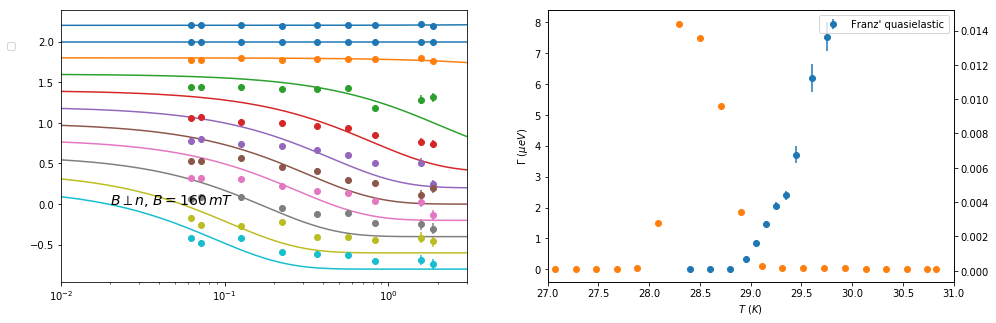

In [23]:
############################################
#see what hapens
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.constants as co
from matplotlib.colors import Colormap, LogNorm
from matplotlib.cm import get_cmap
import pandas as pd
%matplotlib inline
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)

Ts = []
Gammas = []
Gammaerrs = []

index = 0
def get_color(n, number_of_colors, cmapstr):

    cmap = get_cmap(cmapstr)

    return cmap(float(n)/number_of_colors)

for T in vert_result['Select']:
    x           = vert_result['Parameters'][T]['x']
    y           = vert_result['Parameters'][T]['y']
    y_error     = vert_result['Parameters'][T]['y_error']

    c = get_color(index,11,'tab10')
    ax.errorbar(
        x, 
        y+1.2-index*0.2,
        y_error, 
        fmt='o', 
        color=c)
        #label='$T=%.2f\,K$' %SkXCon[T].T_B)
    x = np.linspace(0.01,3,1000)

    ax.plot(x, vert_result['Curve'][T]+1.2-index*0.2, color=c)
    
    index += 1


ax.set_xscale('log')
ax.set_xlim(0.01,3)
ax.legend(bbox_to_anchor=(-0.1,0.9))
ax.text(2e-2, 0, r'$B \perp n$, $B=160\,mT$', fontsize=14)


ax1 = fig.add_subplot(1,2,2)
c = get_color(0,10,'tab10')
ax1.errorbar(
    vert_result['Select'],
    [vert_result['Gamma'][T] for T in vert_result['Select']],
    [vert_result['Gamma_error'][T] for T in vert_result['Select']],
    fmt='o', color=c, label='Franz\' quasielastic')

ax1.set_ylabel(r'$\Gamma\ (\mu eV)$')
ax1.set_xlabel(r'$T\ (K)$')
ax1.set_xlim(27,31)
ax1.legend()

ax2 = ax1.twinx()
c = get_color(1, 10, 'tab10')
ax2.errorbar(
    elastic_result_1['Axis']['100_1'],
    elastic_result_1['Intensity']['100_1'],
    yerr=elastic_result_1['Intensity_error']['100_1'],
    fmt='o', color=c, label='Franz\' elastic')

print(elastic_result_1['Intensity']['100_1'])
#load Jonas' data
#Jdata = pd.read_csv('/Users/alexanderschober/Downloads/Data_analysis_Schober/201806_RESEDA/data/Kindervater_Bvertn_quasielastic', skiprows=6, names=['T1', 'Gamma'])
#c = get_color(0, 10, 'tab10')
#ax1.errorbar(Jdata['T1']+0.2, Jdata['Gamma'], fmt='s', mec=c, mew=2, label='Jonas\' elastic', color='None')

#Jdata = pd.read_csv('data/Kindervater_Bvertn_intensity', skiprows=6, names=['T2', 'Int'])
#c = get_color(1, 10, 'tab10')
#ax2.errorbar(Jdata['T2']+0.2, Jdata['Int']/(22.*3), fmt='s', mec=c, mew=2, label='Jonas\' quasielastic', color='None')
#plt.savefig('B_vert_n.pdf')

# Plot parallel data

[28.6, 29.0, 29.1, 29.2, 29.4, 29.6, 29.8, 30.0]
[1.01058076 1.00967157 1.01061167 0.0484993  1.01014877 1.00976321
 1.00942497 1.00856799]
[0.96323079 0.95287001 0.98280711 0.8368817  0.86051461 0.92529293
 0.65944779 0.65223978]
[0.97380776 0.85406572 0.81238675 0.7776311  0.71578907 0.82186852
 0.39316578 0.53694041]
[1.03160578 0.87462085 1.02273171 0.58959349 0.50296645 0.52236966
 0.38145684 0.14034147]
[0.93724241 0.75817537 0.51223306 0.64496213 0.43775665 0.38504403
 0.1155507  0.05810715]
[1.03286775 0.68651169 0.59282916 0.31650569 0.51152298 0.37626472
 0.06969119 0.20158715]
[0.91600867 0.66107313 0.5511825  0.32699103 0.30391082 0.16697458
 0.30494993 0.14010694]
[0.76504422 0.38060924 0.01243215 0.03373237 0.07644417 0.31043972
 0.20958195 0.35668126]


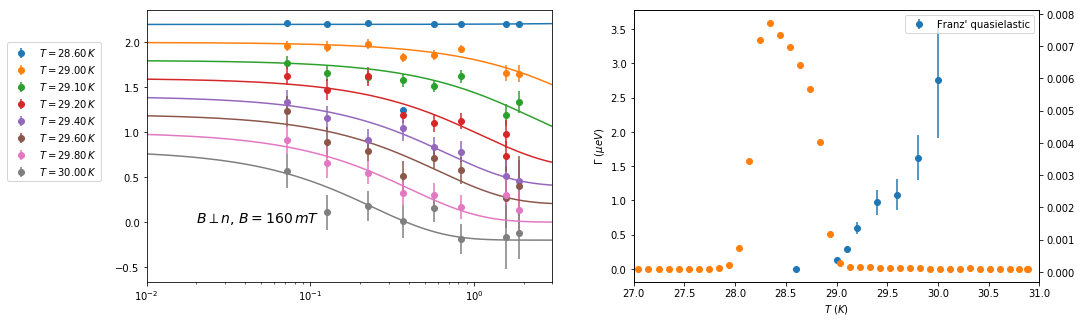

In [24]:
############################################
#see what hapens
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.constants as co
from matplotlib.colors import Colormap, LogNorm
from matplotlib.cm import get_cmap
import pandas as pd
%matplotlib inline
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)

Ts = []
Gammas = []
Gammaerrs = []

index = 0

def get_color(n, number_of_colors, cmapstr):

    cmap = get_cmap(cmapstr)

    return cmap(float(n)/number_of_colors)

print(parallel_result['Select'])
for T in parallel_result['Select']:
    
    x           = parallel_result['Parameters'][T]['x']
    y           = parallel_result['Parameters'][T]['y']
    print(y)
    y_error     = parallel_result['Parameters'][T]['y_error']

    c = get_color(index,10,'tab10')
    ax.errorbar(
        x, 
        y+1.2-index*0.2,
        y_error, 
        fmt='o', 
        color=c,
        label='$T=%.2f\,K$' %T)
    x = np.linspace(0.01,3,1000)

    ax.plot(x, parallel_result['Curve'][T]+1.2-index*0.2, color=c)
    
    index += 1


ax.set_xscale('log')
ax.set_xlim(0.01,3)
ax.legend(bbox_to_anchor=(-0.1,0.9))
ax.text(2e-2, 0, r'$B \perp n$, $B=160\,mT$', fontsize=14)


ax1 = fig.add_subplot(1,2,2)
c = get_color(0,10,'tab10')
ax1.errorbar(
    parallel_result['Select'],
    [parallel_result['Gamma'][T] for T in parallel_result['Select']],
    [parallel_result['Gamma_error'][T] for T in parallel_result['Select']],
    fmt='o', color=c, label='Franz\' quasielastic')

ax1.set_ylabel(r'$\Gamma\ (\mu eV)$')
ax1.set_xlabel(r'$T\ (K)$')
ax1.set_xlim(27,31)
ax1.legend()

ax2 = ax1.twinx()
c = get_color(1, 10, 'tab10')
ax2.errorbar(
    elastic_result_2['Axis']['110_1'], 
    elastic_result_2['Intensity']['110_1'], 
    yerr=elastic_result_2['Intensity_error']['110_1'], 
    fmt='o', color=c, label='Franz\' elastic')

#load Jonas' data
#Jdata = pd.read_csv('data/Kindervater_Bparan_quasielastic', skiprows=6, names=['T1', 'Gamma'])
#c = get_color(0, 10, 'tab10')
#ax1.errorbar(Jdata['T1']+0.4, Jdata['Gamma'], fmt='s', mec=c, mew=2, label='Jonas\' elastic', color='None')

#Jdata = pd.read_csv('data/Kindervater_Bparan_intensity', skiprows=6, names=['T2', 'Int'])
#c = get_color(1, 10, 'tab10')
#ax2.errorbar(Jdata['T2']+0.4, Jdata['Int']/(44*3), fmt='s', mec=c, mew=2, label='Jonas\' quasielastic', color='None')
plt.savefig('B_parallel_n.pdf')